## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from random import shuffle
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

## Import Dataset

In [2]:
df_pen = sns.load_dataset('penguins')

In [3]:
df_pen = df_pen.sample(frac=1).reset_index(drop=True)

In [4]:
X = df_pen.drop(['island'], axis = 1)
y = df_pen['island']

## Data Pre-processing

In [5]:
categorical_x = ['species', 'sex']
numerical_x = X.drop(categorical_x, axis = 1).columns

In [6]:
## If y is categorical:
y.fillna(y.mode(), inplace= True)
##If y is numerical
# y.fillna(y.mean(), inplace= True)
for i in numerical_x:
    X[i].fillna(X[i].mean(), inplace = True)

for i in categorical_x:
    X[i].fillna(X[i].mode().iloc[0], inplace = True)
    
categoricas = pd.get_dummies(X[categorical_x], drop_first=True)
X = pd.concat([categoricas, X[numerical_x]], axis = 1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=45)

In [8]:
escalador = StandardScaler()
escalador.fit(X_train)

X_train = escalador.transform(X_train)
X_test = escalador.transform(X_test)

## Model implementation

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [11]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

## Evaluation

In [12]:
y_pred = knn_model.predict(X_test)

In [13]:
metrics.accuracy_score(y_test,y_pred)

0.7246376811594203

In [14]:
metrics.confusion_matrix(y_test,y_pred)

array([[28,  4,  3],
       [ 2, 18,  6],
       [ 0,  4,  4]], dtype=int64)

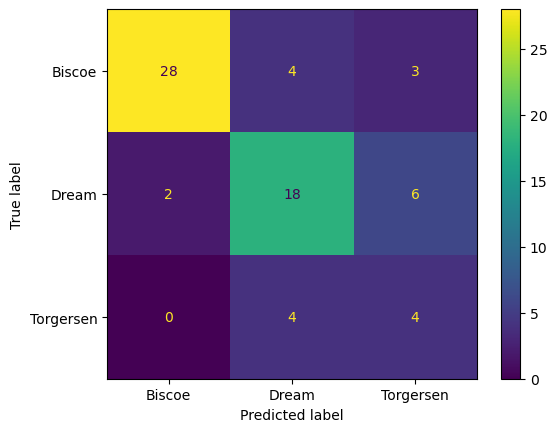

In [15]:
cm = metrics.confusion_matrix(y_test,y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=knn_model.classes_).plot()

In [16]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Biscoe       0.93      0.80      0.86        35
       Dream       0.69      0.69      0.69        26
   Torgersen       0.31      0.50      0.38         8

    accuracy                           0.72        69
   macro avg       0.64      0.66      0.64        69
weighted avg       0.77      0.72      0.74        69



## Elbow method

In [17]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train) 
   
    y_pred_test = knn_model.predict(X_test)
    
    test_error = 1 - metrics.accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

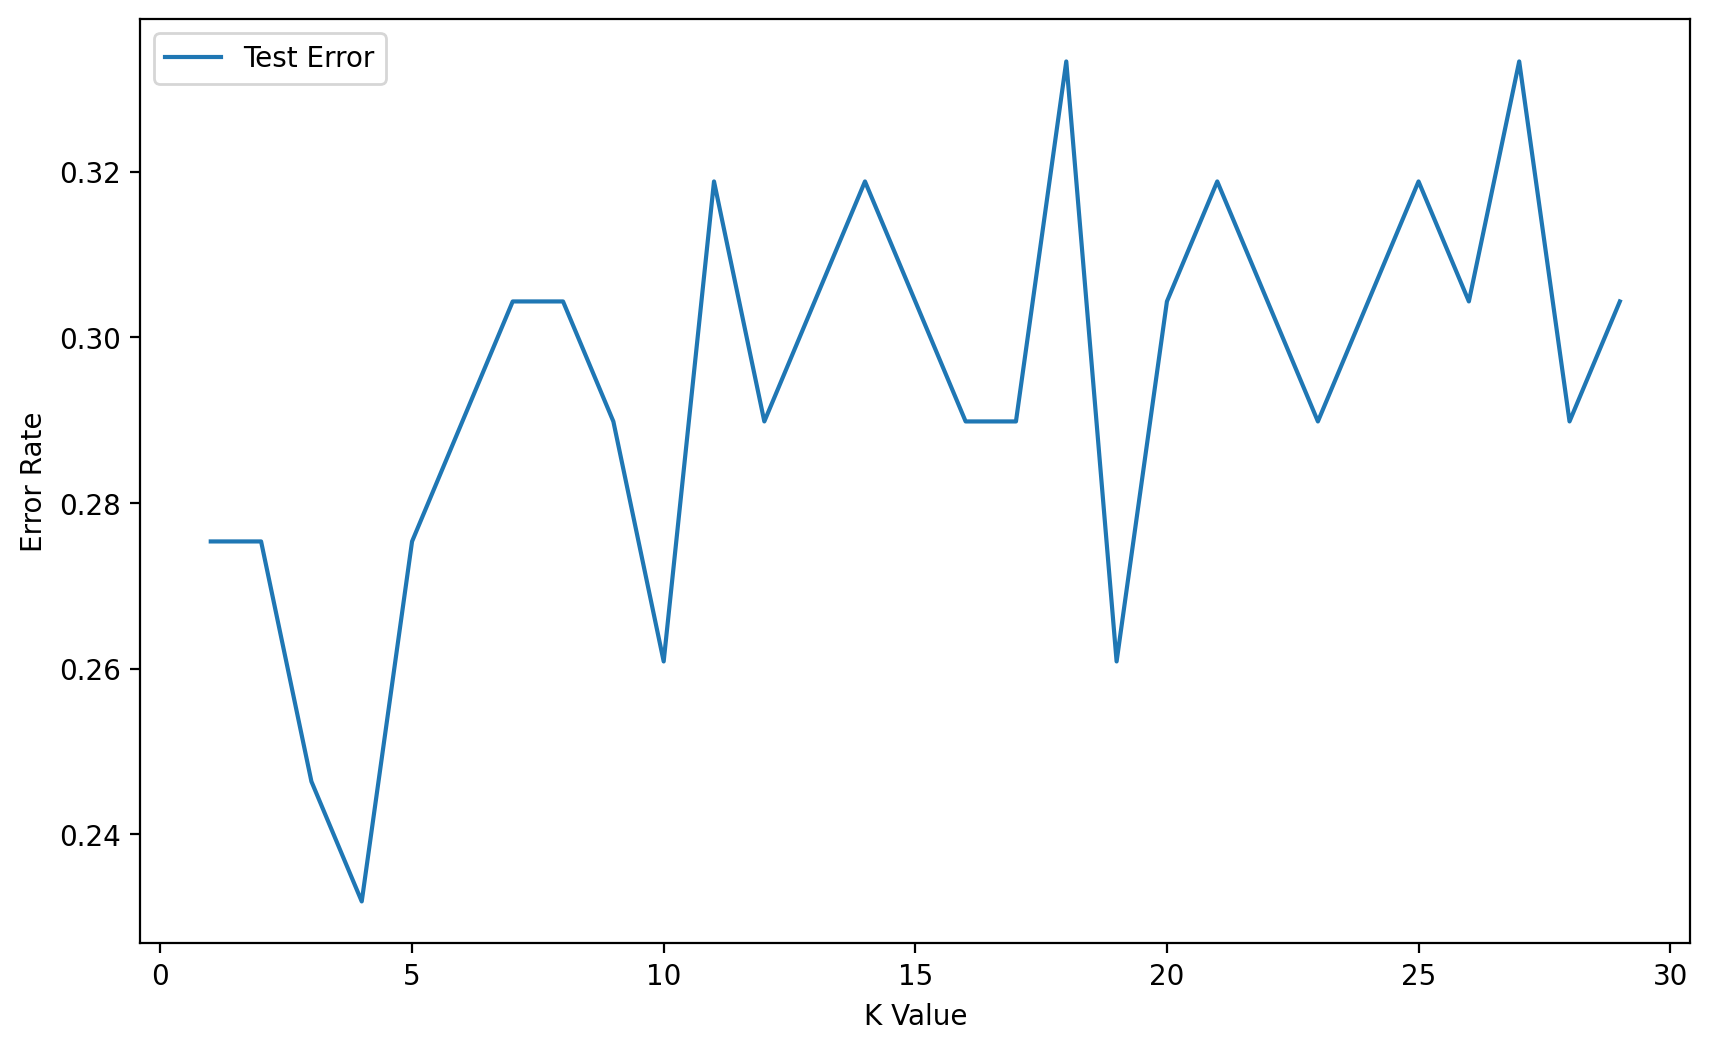

In [18]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

## Grid Search

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
knn_model = KNeighborsClassifier()

In [21]:
n_neighbors = np.linspace(1,30, 30).astype(int)

In [22]:
grid_model = GridSearchCV(knn_model,param_grid={'n_neighbors':n_neighbors}, cv = 5, scoring='accuracy')

In [23]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             scoring='accuracy')

In [24]:
grid_model.best_params_

{'n_neighbors': 19}

In [25]:
y_pred = grid_model.predict(X_test)

In [26]:
metrics.accuracy_score(y_test,y_pred)

0.7391304347826086

In [27]:
metrics.confusion_matrix(y_test,y_pred)

array([[26,  7,  2],
       [ 1, 23,  2],
       [ 1,  5,  2]], dtype=int64)

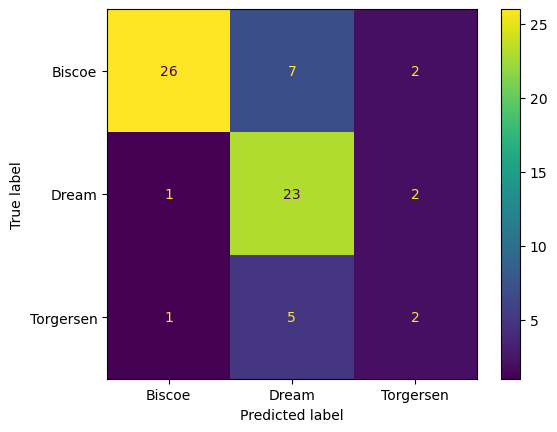

In [28]:
cm = metrics.confusion_matrix(y_test,y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=grid_model.classes_).plot()

In [29]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Biscoe       0.93      0.74      0.83        35
       Dream       0.66      0.88      0.75        26
   Torgersen       0.33      0.25      0.29         8

    accuracy                           0.74        69
   macro avg       0.64      0.63      0.62        69
weighted avg       0.76      0.74      0.74        69



## Pipeline

In [30]:
X = df_pen.drop(['island'], axis = 1)
y = df_pen['island']

In [31]:
categorical_x = ['species', 'sex']
numerical_x = X.drop(categorical_x, axis = 1).columns

In [32]:
## If y is categorical:
y.fillna(y.mode(), inplace= True)
##If y is numerical
# y.fillna(y.mean(), inplace= True)
for i in numerical_x:
    X[i].fillna(X[i].mean(), inplace = True)

for i in categorical_x:
    X[i].fillna(X[i].mode().iloc[0], inplace = True)
    
categoricas = pd.get_dummies(X[categorical_x], drop_first=True)
X = pd.concat([categoricas, X[numerical_x]], axis = 1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=45)

## Pipeline Process

In [34]:
scaler = StandardScaler()

In [35]:
knn = KNeighborsClassifier()

In [36]:
operations = [('scaler',scaler),('knn',knn)]

In [37]:
from sklearn.pipeline import Pipeline

In [38]:
pipe = Pipeline(operations)

In [39]:
k_values = list(range(1,30))

In [40]:
param_grid = {'knn__n_neighbors': k_values}

In [41]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [42]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [43]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=18))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=18),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 18,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [44]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [45]:
pd.DataFrame(full_cv_classifier.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005655,8.073373e-04,0.005948,0.001036,1,{'knn__n_neighbors': 1},0.727273,0.654545,0.672727,0.690909,0.763636,0.701818,0.039165,13
1,0.004865,1.995325e-04,0.004964,0.000008,2,{'knn__n_neighbors': 2},0.745455,0.563636,0.672727,0.654545,0.745455,0.676364,0.067444,22
2,0.005061,4.867672e-04,0.005157,0.000505,3,{'knn__n_neighbors': 3},0.727273,0.600000,0.690909,0.654545,0.745455,0.683636,0.052192,20
3,0.006246,1.646281e-03,0.005951,0.001801,4,{'knn__n_neighbors': 4},0.672727,0.618182,0.709091,0.618182,0.745455,0.672727,0.050124,25
4,0.005352,1.095586e-03,0.005158,0.000742,5,{'knn__n_neighbors': 5},0.654545,0.600000,0.690909,0.581818,0.763636,0.658182,0.065455,29
5,0.005059,7.290251e-04,0.004861,0.000371,6,{'knn__n_neighbors': 6},0.727273,0.636364,0.672727,0.654545,0.800000,0.698182,0.059307,15
6,0.004960,2.132481e-07,0.005258,0.000243,7,{'knn__n_neighbors': 7},0.618182,0.618182,0.709091,0.618182,0.763636,0.665455,0.060412,26
7,0.005159,2.424070e-04,0.005257,0.000397,8,{'knn__n_neighbors': 8},0.654545,0.618182,0.672727,0.618182,0.818182,0.676364,0.073989,23
8,0.004959,1.862719e-06,0.005357,0.000198,9,{'knn__n_neighbors': 9},0.654545,0.618182,0.672727,0.600000,0.781818,0.665455,0.063610,26
9,0.005357,3.711057e-04,0.005456,0.000444,10,{'knn__n_neighbors': 10},0.690909,0.672727,0.672727,0.600000,0.763636,0.680000,0.052192,21


In [46]:
y_pred = full_cv_classifier.predict(X_test)

In [47]:
metrics.accuracy_score(y_test,y_pred)

0.6666666666666666

In [48]:
metrics.confusion_matrix(y_test,y_pred)

array([[25,  7,  3],
       [ 2, 20,  4],
       [ 1,  6,  1]], dtype=int64)

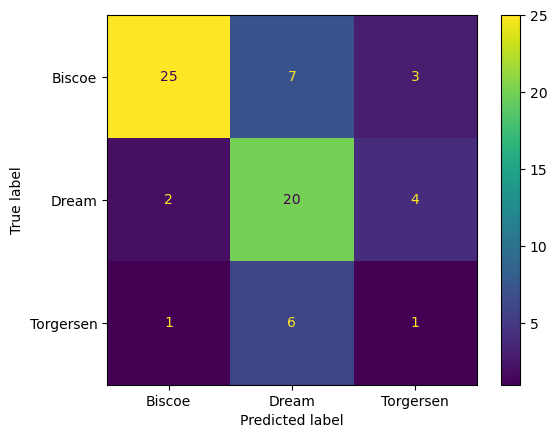

In [49]:
cm = metrics.confusion_matrix(y_test,y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=full_cv_classifier.classes_).plot()

In [50]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Biscoe       0.89      0.71      0.79        35
       Dream       0.61      0.77      0.68        26
   Torgersen       0.12      0.12      0.12         8

    accuracy                           0.67        69
   macro avg       0.54      0.54      0.53        69
weighted avg       0.70      0.67      0.67        69



## Final Model

In [51]:
scaler = StandardScaler()
knn9 = KNeighborsClassifier(n_neighbors=9)
operations = [('scaler',scaler),('knn9',knn9)]

In [52]:
pipe = Pipeline(operations)

In [53]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn9', KNeighborsClassifier(n_neighbors=9))])

In [54]:
pipe_pred = pipe.predict(X_test)

In [55]:
print(metrics.classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

      Biscoe       0.89      0.71      0.79        35
       Dream       0.72      0.81      0.76        26
   Torgersen       0.25      0.38      0.30         8

    accuracy                           0.71        69
   macro avg       0.62      0.63      0.62        69
weighted avg       0.75      0.71      0.73        69



In [56]:
single_sample = X_test.iloc[40]

In [57]:
pipe.predict(single_sample.values.reshape(1, -1))

C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array(['Dream'], dtype=object)

In [58]:
pipe.predict_proba(single_sample.values.reshape(1, -1))

C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0., 1., 0.]])